In [4]:
import pandas as pd

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('bank1.csv')

In [8]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [15]:
X= data[['Income','Age']]

In [16]:
y= data['Personal Loan'].copy()

In [17]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, random_state = 99)

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
from sklearn.metrics import confusion_matrix

In [162]:
import numpy as np

In [163]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_val)
y_prob = LR.predict_proba(X_val)[:,1]

In [164]:
y_val = y_val.reset_index()
y_val.drop('index', axis = 1, inplace = True)

In [165]:
pred_df = pd.DataFrame()
pred_df['true_value'] = y_val
pred_df['prob'] = y_prob
Profit_df = pd.DataFrame()
threshold = np.arange(0,1,0.05)
Profit_df['threshold'] = threshold
m = threshold.shape[0] 
Profit = np.zeros(m)
TP_FP = np.zeros(m)
TP = np.zeros(m)
for k, i in enumerate(threshold):
    pred_df['predicted_threshold_' + str(i)] = pred_df['prob'].apply(lambda x: 1 if x > i else 0)
    TP_FP[k] = pred_df['predicted_threshold_' + str(i)].sum()
    TP[k] = np.sum((pred_df['predicted_threshold_' + str(i)]==1)& (pred_df['true_value'].values ==1))
    Profit_df['threshold'] = np.arange(0,1,0.05)
    #Assume 18 dollars price, 5 dollars cost
    Profit[k] = 18 * TP_FP[k] - 5 * TP[k]
    
Profit_df['profit'] = Profit 
Profit_df['TP'] = TP
Profit_df['TP_FP'] = TP_FP

In [249]:
Profit_df.head()

,threshold,profit,TP,TP_FP
0,0.00,35015.0,197.0,2000.0
1,0.05,10076.0,188.0,612.0
2,0.10,7129.0,169.0,443.0
3,0.15,5655.0,147.0,355.0
4,0.20,4892.0,134.0,309.0


In [168]:
import seaborn as sns

<AxesSubplot:xlabel='threshold', ylabel='profit'>

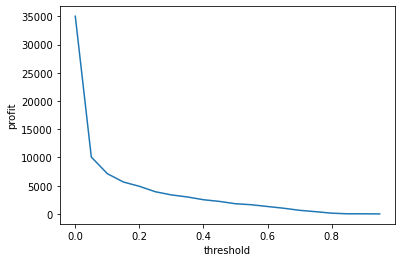

In [173]:
sns.lineplot(x = 'threshold', y = 'profit', data = Profit_df)

In [233]:
from sklearn.naive_bayes import BernoulliNB

In [184]:
X['income_bin'] = pd.qcut(X['Income'], q=[0, .2, .4, .6, .8, 1], labels = [0,1,2,3,4])
X['age_bin'] = pd.qcut(X['Age'], q=[0, .2, .4, .6, .8, 1], labels = [0,1,2,3,4])

In [197]:
X = X[['income_bin','age_bin']]

In [198]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, random_state = 99)

In [245]:
NB = BernoulliNB()
NB.fit(X_train, y_train)
y_pred_NB = NB.predict(X_val)

In [246]:
y_val = y_val.reset_index()
y_val.drop('index', axis = 1, inplace = True)

In [247]:
pred_df_NB = pd.DataFrame()
pred_df_NB['true_value'] = y_val
pred_df_NB['y_pred_NB'] = y_pred_NB

In [248]:
TP_FP_NB = pred_df_NB['y_pred_NB'].sum()
TP_NB = np.sum((pred_df_NB['y_pred_NB']==1) & (pred_df_NB['true_value'].values ==1))
Profit = 18 * TP_FP_NB - 5 * TP_NB